In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 

In [5]:
data = pd.read_csv("data.csv")

data.drop(["Unnamed: 32"],axis=1,inplace=True)
data.drop(["id"],axis=1,inplace=True)

data.diagnosis= [1 if i=="M" else 0 for i in data.diagnosis]
y=data.diagnosis.values
X=data.drop(["diagnosis"],axis=1)

X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=44)

In [6]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn doğruluk değeri:",knnDogruluk)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[104   4]
 [  3  60]]
Knn doğruluk değeri: 0.9590643274853801


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Knn doğruluk değeri: 0.9590643274853801


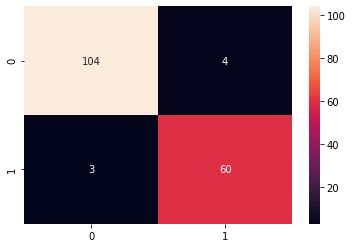

In [7]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn doğruluk değeri:",knnDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Logistik Regresyon doğruluk: 0.9707602339181286


E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


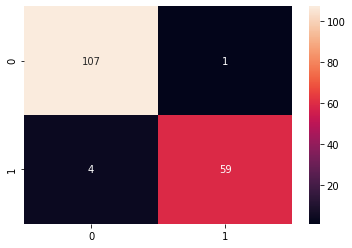

In [8]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(classification_report(y_test,y_pred))

logDogruluk=accuracy_score(y_test,y_pred)
print("Logistik Regresyon doğruluk:", logDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.90      0.97      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Decision Tree doğruluk: 0.9473684210526315


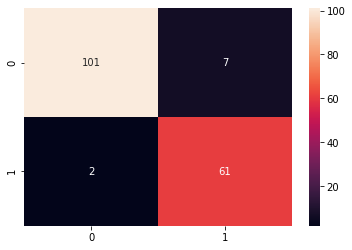

In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

dtDogruluk=accuracy_score(y_test,y_pred)
print("Decision Tree doğruluk:", dtDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

SVM doğruluk: 0.9532163742690059


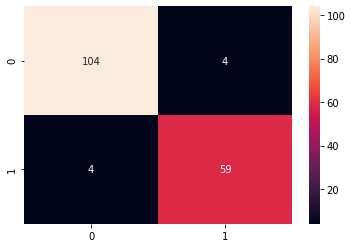

In [13]:
dvm = SVC()
dvm.fit(X_train,y_train)

y_pred=dvm.predict(X_test)
print(classification_report(y_test,y_pred))

dvmDogruluk=accuracy_score(y_test,y_pred)
print("SVM doğruluk:", dvmDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Gaussian NB doğruluk: 0.9415204678362573


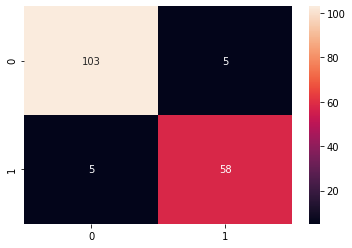

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [15]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB'],
                        'Score':[logDogruluk,dtDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk]})

In [16]:
modeller

,Model,Score
0,Logistik Regresyon,0.970760
1,Karar Ağaçları,0.947368
2,Destek Vektör Makinesi,0.953216
3,K-en yakın komşu,0.959064
4,Gaussian NB,0.941520


In [18]:
modeller.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistik Regresyon,0.970760
3,K-en yakın komşu,0.959064
2,Destek Vektör Makinesi,0.953216
1,Karar Ağaçları,0.947368
4,Gaussian NB,0.941520


<BarContainer object of 5 artists>

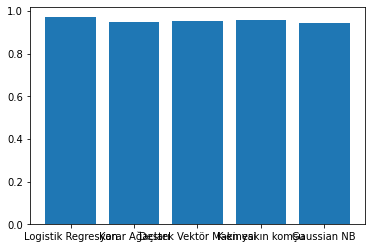

In [19]:
plt.bar(modeller.Model,modeller.Score)